## TASK 2 (BUILDING A MOVIE RATING MODEL)

#### ATHUR: KPAN MACLEAN FURIKAARA 

IMPORTATION OF ALL RELEVANT LIBRARIES FOR ANALYSIS, VISUALIZATION AND MACHINE LEARNING

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning libraries
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score

In [151]:
dataset = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
dataset.dropna(inplace=True)
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [152]:
dataset.shape

(5659, 10)

In [153]:
dataset.describe() 

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [154]:
dataset.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [155]:
dataset.describe(include='all') 

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [156]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

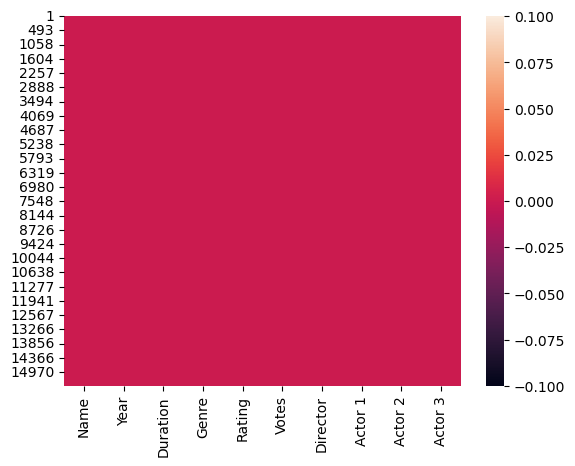

In [157]:
sns.heatmap(dataset.isnull());

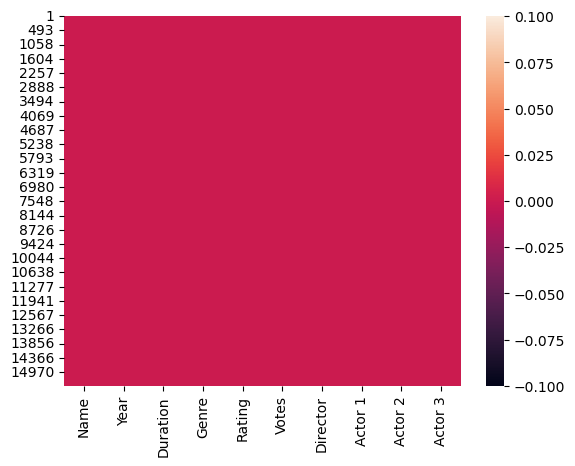

In [158]:
sns.heatmap(dataset.isna());

In [159]:
missing_count = dataset.isnull().sum().sort_values(ascending = False)
missing_percent = (round(dataset.isnull().sum()/dataset.isnull().count(), 4)*100).sort_values(ascending=False)
missing_d = pd.concat([missing_count, missing_percent], axis =1, keys= ['MISSING COUNT', 'MISSING PERCENT'])
missing_d

,MISSING COUNT,MISSING PERCENT
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [160]:
dataset.dropna(subset = [ 'Rating'], inplace = True)
(round(dataset.isnull().sum()/dataset.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [161]:
dataset.dropna(subset = [ 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace = True)
(round(dataset.isnull().sum()/dataset.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [162]:
dataset['Duration']= pd.to_numeric(dataset['Duration'].str.strip('min'))
dataset['Duration'].fillna(dataset['Duration'].mean(), inplace= True)

dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [163]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(5659, 10)

In [164]:
dataset[ 'Year']=dataset['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in dataset[ 'Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
dataset['Year'] = year_lst

In [165]:
dataset['Votes'] = dataset['Votes'].str.replace(',', '').astype(int)
dataset['Year'] = dataset['Year'].astype(int)
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 442.1+ KB


In [166]:
dataset['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1947, 1931, 1933, 1943, 1944,
       1932, 1939, 1934])

In [167]:
(dataset['Duration']>180).sum()

113

In [168]:
(dataset['Duration']<60).sum()

27

In [169]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 442.1+ KB


Breaking down parts of data into percentiles to analyse

In [170]:
dataset[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8,0.9,0.95,0.98])

,Rating,Duration,Votes
count,5659.000000,5659.000000,5659.000000
mean,5.898533,133.439124,2697.649585
std,1.381165,25.319939,13651.503584
min,1.100000,21.000000,5.000000
50%,6.100000,135.000000,131.000000
75%,6.900000,150.000000,922.500000
80%,7.100000,154.000000,1567.800000
90%,7.500000,164.000000,5137.200000
95%,7.900000,172.000000,12028.000000
98%,8.200000,180.000000,26493.960000


Checking how the duration is spread

<function matplotlib.pyplot.show(close=None, block=None)>

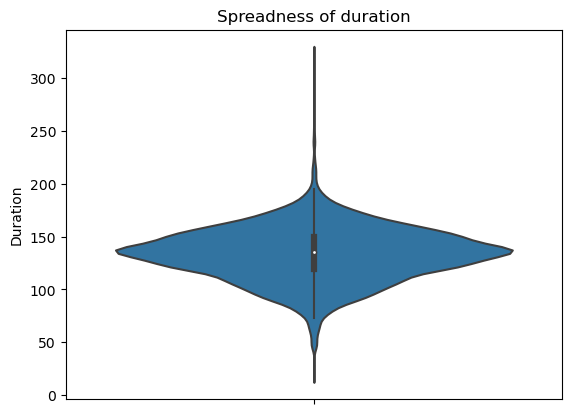

In [171]:
sns.violinplot(y=dataset['Duration'])
plt.title('Spreadness of duration')
plt.show

Checking distribution of the duration

M:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


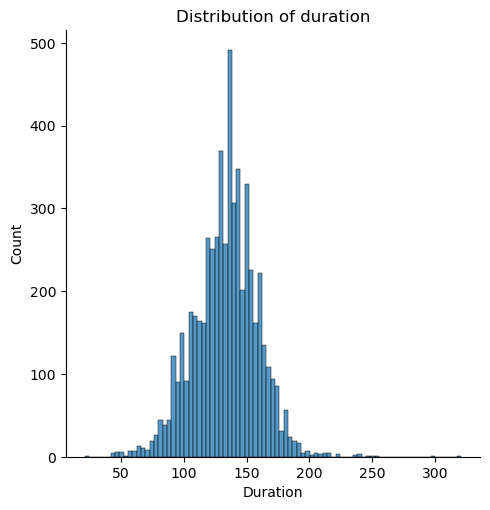

In [172]:
sns.displot(dataset['Duration'])
plt.title('Distribution of duration')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

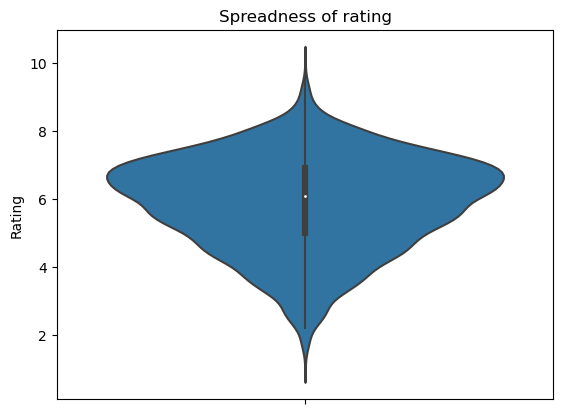

In [173]:
sns.violinplot(y=dataset['Rating'])
plt.title('Spreadness of rating')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

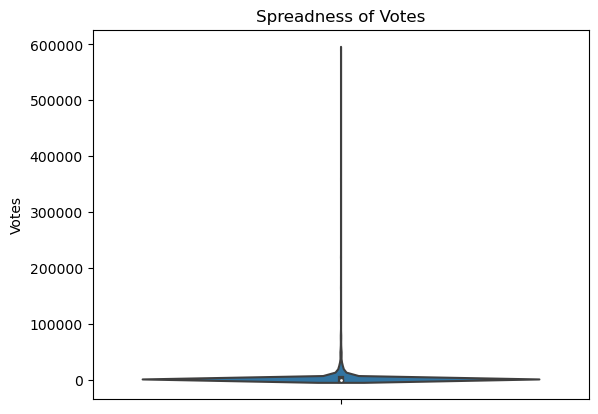

In [174]:
sns.violinplot(y=dataset['Votes'])
plt.title('Spreadness of Votes')
plt.show

M:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


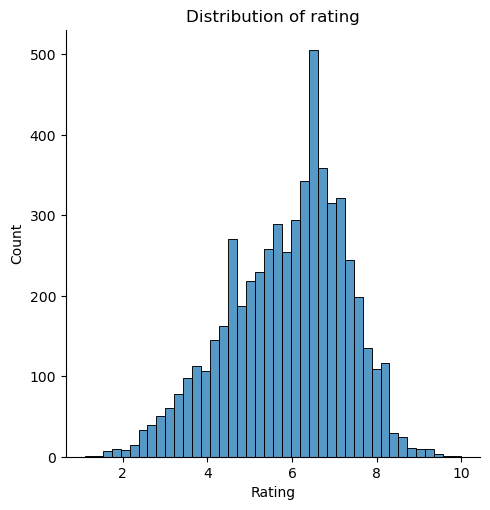

In [175]:
sns.displot(dataset['Rating'])
plt.title('Distribution of rating')
plt.show()

M:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


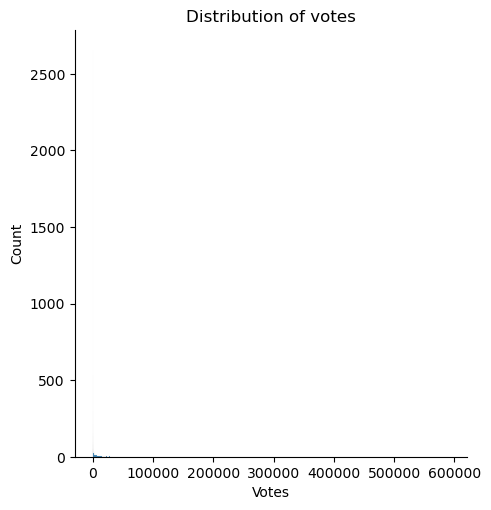

In [176]:
sns.displot(dataset['Votes'])
plt.title('Distribution of votes')
plt.show()

In [177]:
dataset[dataset['Votes']>10**5]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016,161,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,2020,101,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,1982,191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,2001,224,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,2012,127,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,2007,165,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,2016,118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,2010,165,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,2014,153,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


Plotting a graph to show the average rating per year

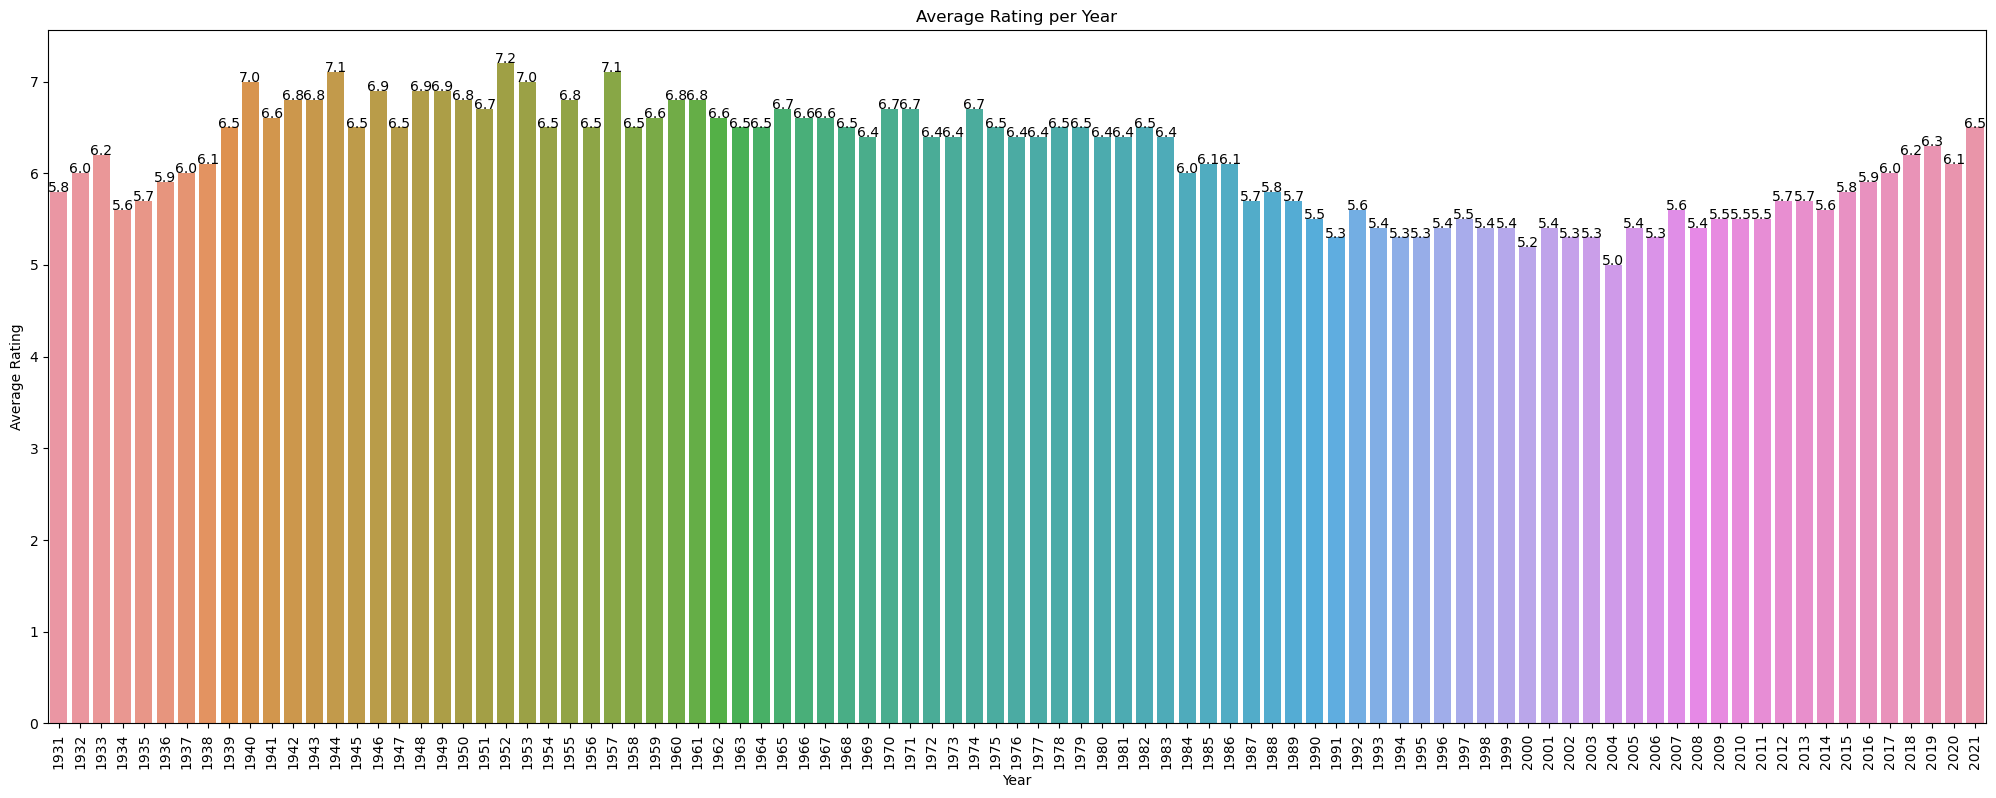

In [178]:
# Group by year and calculate mean rating
yearly_rating = dataset.groupby('Year')['Rating'].mean().reset_index()

# Round the ratings to one decimal place
yearly_rating['Rating'] = yearly_rating['Rating'].round(1)

plt.figure(figsize=(25, 9))
axx = sns.barplot(data=yearly_rating, x='Year', y='Rating')

# Add labels to the bars
for index, row in yearly_rating.iterrows():
    axx.text(index, row['Rating'], str(row['Rating']), color='black', ha="center")

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

Plotting a graph to show the number of movies released on a yearly basis

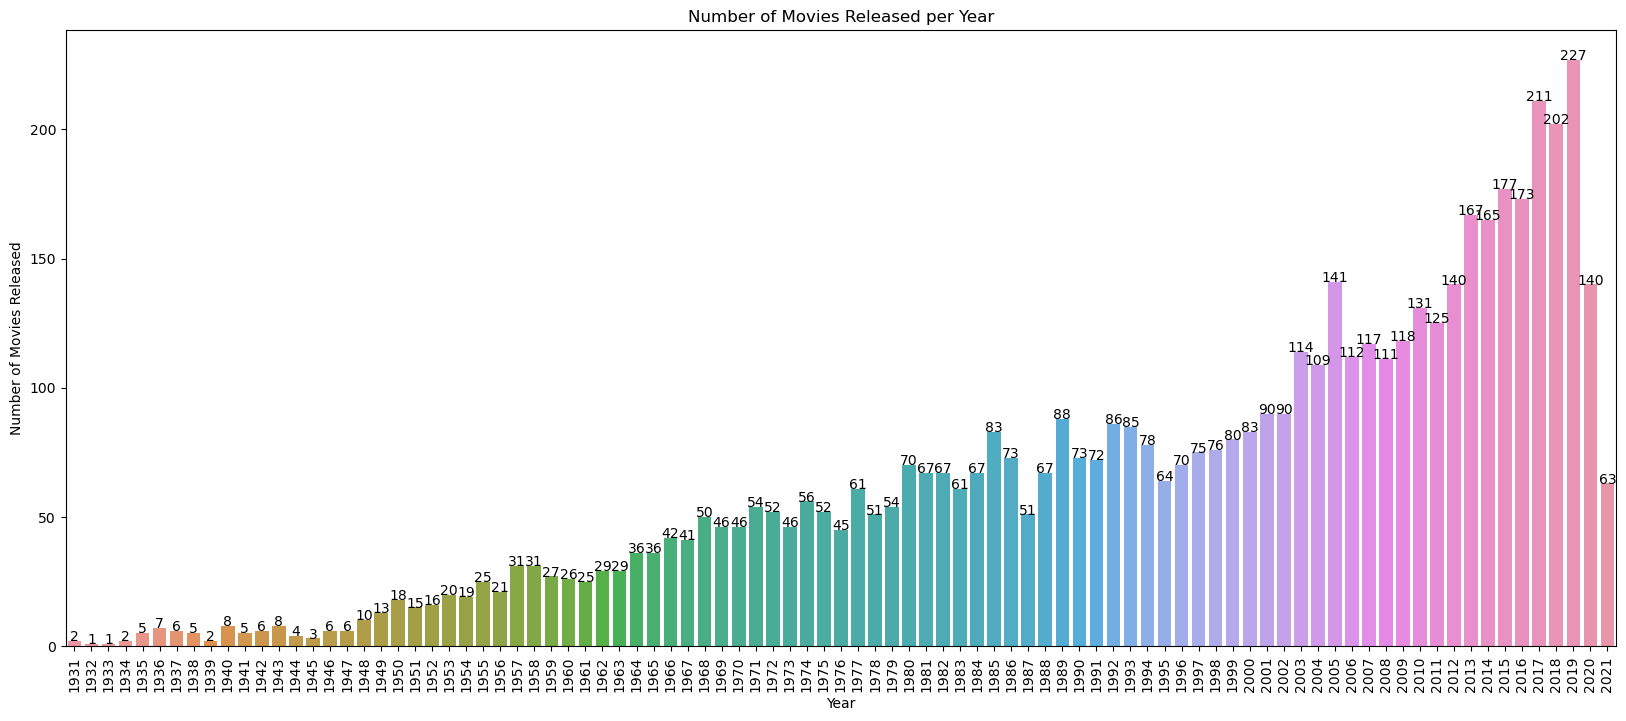

In [179]:
yrcount = dataset.groupby('Year')['Name'].count().reset_index().rename(columns={'Name': 'count'})

# Sort by count in descending order
yrcount = yrcount.sort_values(by='count', ascending=False)

plt.figure(figsize=(20, 8))
axx = sns.barplot(data=yrcount, x='Year', y='count')

# Add labels to the bars
for index, row in yrcount.iterrows():
    axx.text(index, row['count'], str(row['count']), color='black', ha="center")

plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.xticks(rotation=90)
plt.show()

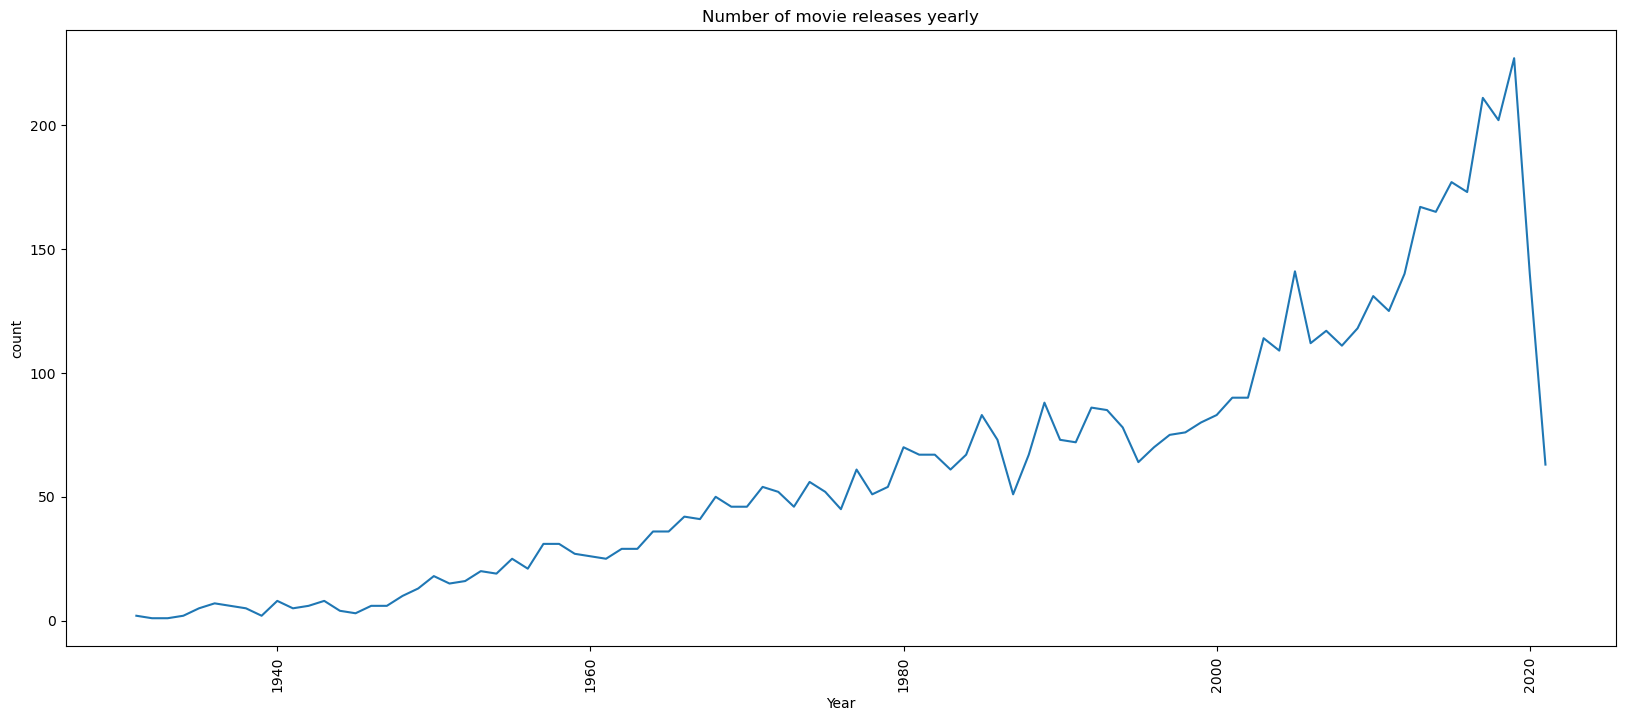

In [180]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=yrcount, x = 'Year', y= 'count')
plt.title('Number of movie releases yearly')
plt.xticks(rotation =90)
plt.show()


plot top 20 high average rated genres

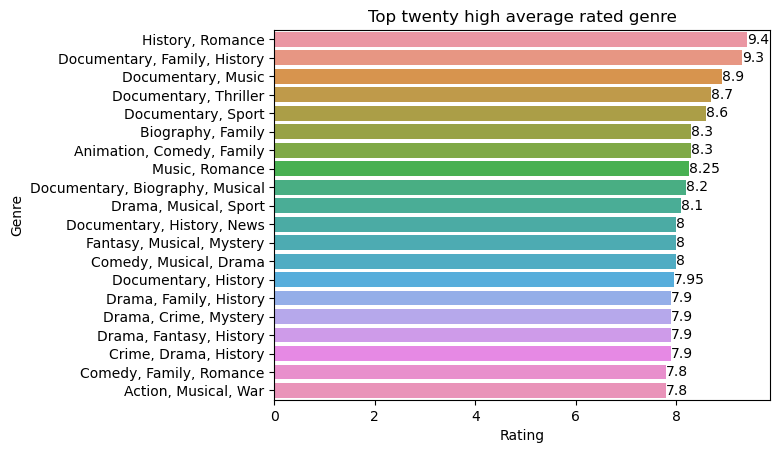

In [181]:
genreRate = dataset.groupby('Genre').agg({"Rating": "mean"}).sort_values(by='Rating', ascending=False).reset_index().head(20)

ax = sns.barplot(data=genreRate, x="Rating", y="Genre")
ax.bar_label(ax.containers[0])
plt.title("Top twenty high average rated genre")
plt.show()

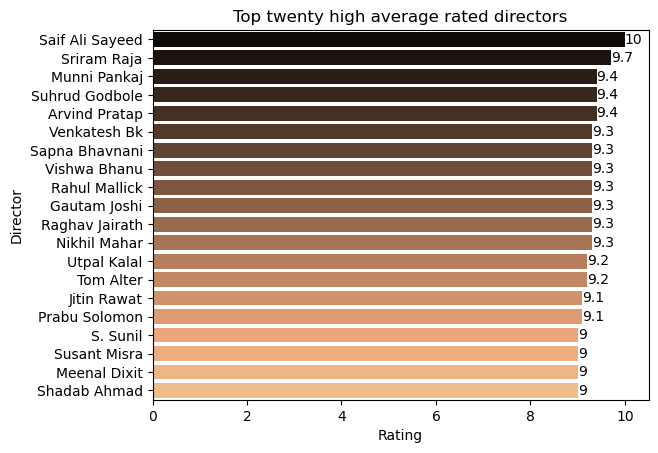

In [182]:
directorRate = dataset.groupby('Director').agg({"Rating": "mean"}).sort_values(by='Rating', ascending=False).reset_index().head(20)

ax = sns.barplot(data=directorRate, x="Rating", y="Director", palette= 'copper')
ax.bar_label(ax.containers[0])
plt.title("Top twenty high average rated directors")
plt.show()

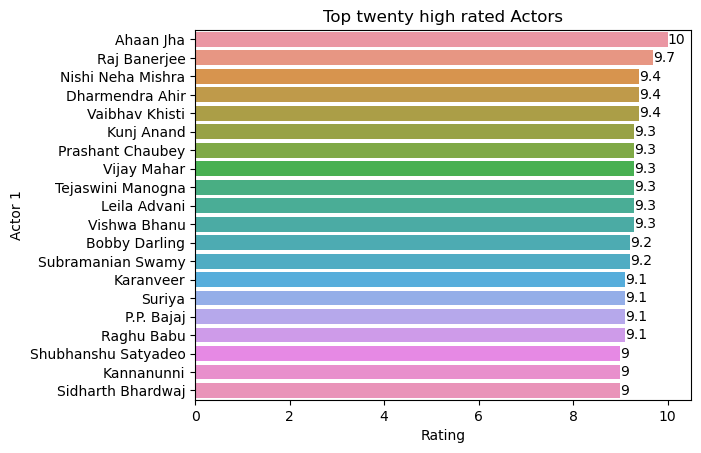

In [183]:
actor1_Rate = dataset.groupby('Actor 1').agg({"Rating": "mean"}).sort_values(by='Rating', ascending=False).reset_index().head(20)

ax = sns.barplot(data=actor1_Rate, x="Rating", y="Actor 1")
ax.bar_label(ax.containers[0])
plt.title("Top twenty high rated Actors")
plt.show()

Relation that exists between votes and ratings 

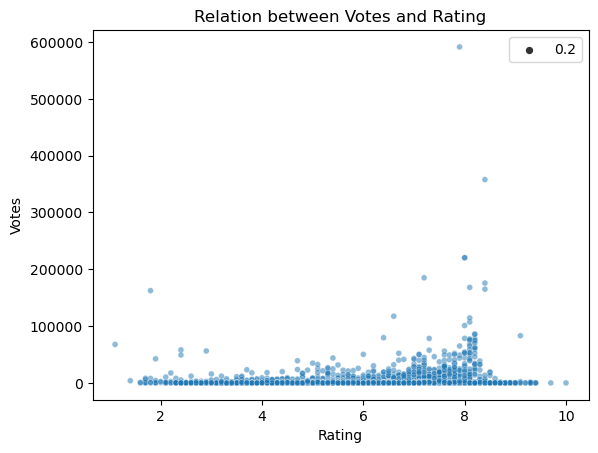

In [184]:
sns.scatterplot(data=dataset, x= "Rating", y= "Votes", size= 2/10, alpha=0.5)
plt.title('Relation between Votes and Rating')
plt.show()


Relation between Rating and Duration

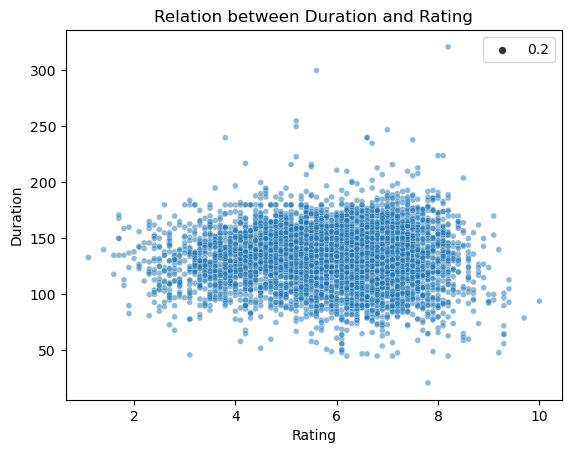

In [185]:
sns.scatterplot(data=dataset, x= "Rating", y= "Duration", size= 2/10, alpha=0.5)
plt.title('Relation between Duration and Rating')
plt.show()


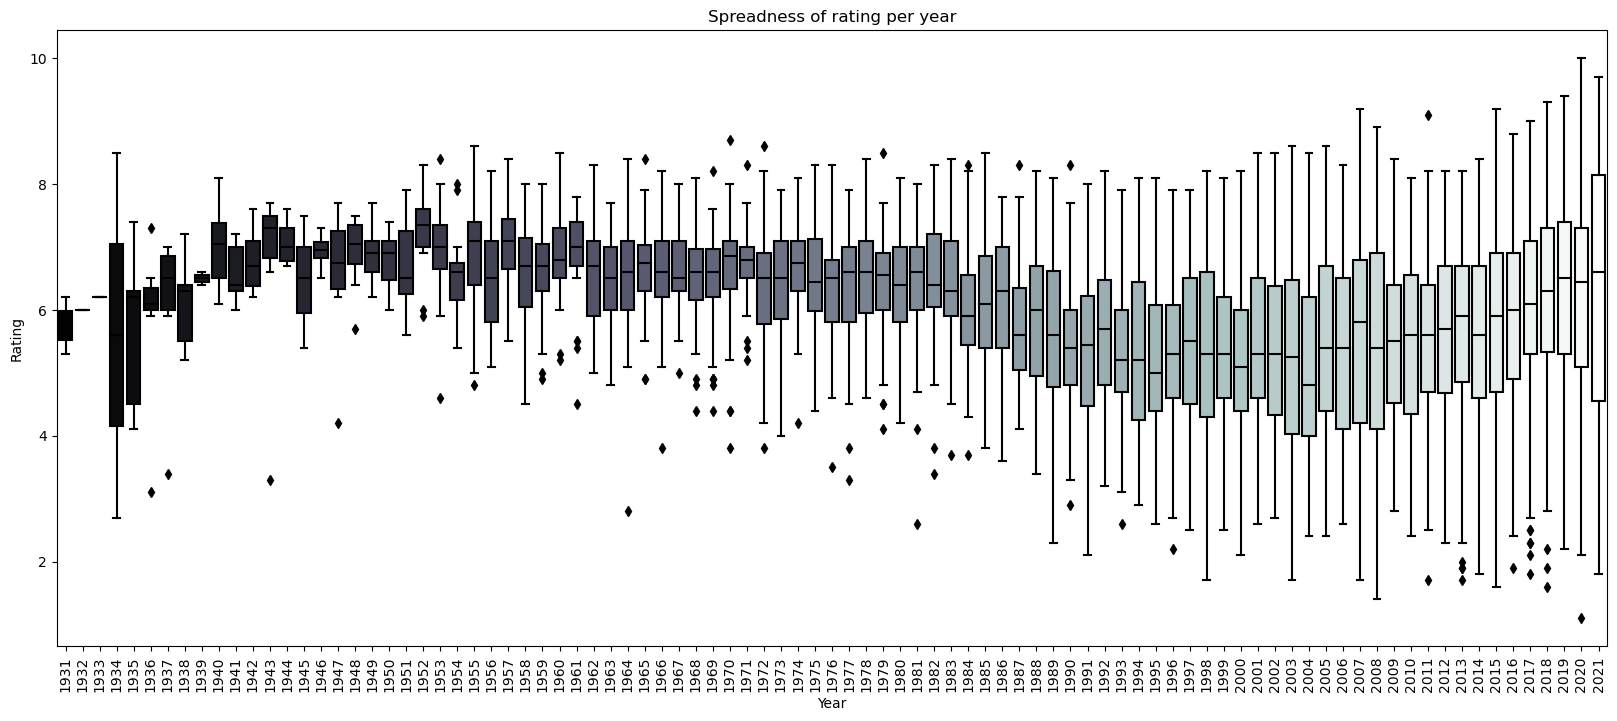

In [186]:
plt.figure(figsize=(20,8))
sns.boxplot(data=dataset, x= "Year", y="Rating", palette="bone")
plt.title('Spreadness of rating per year')
plt.xticks(rotation = 90)
plt.show()

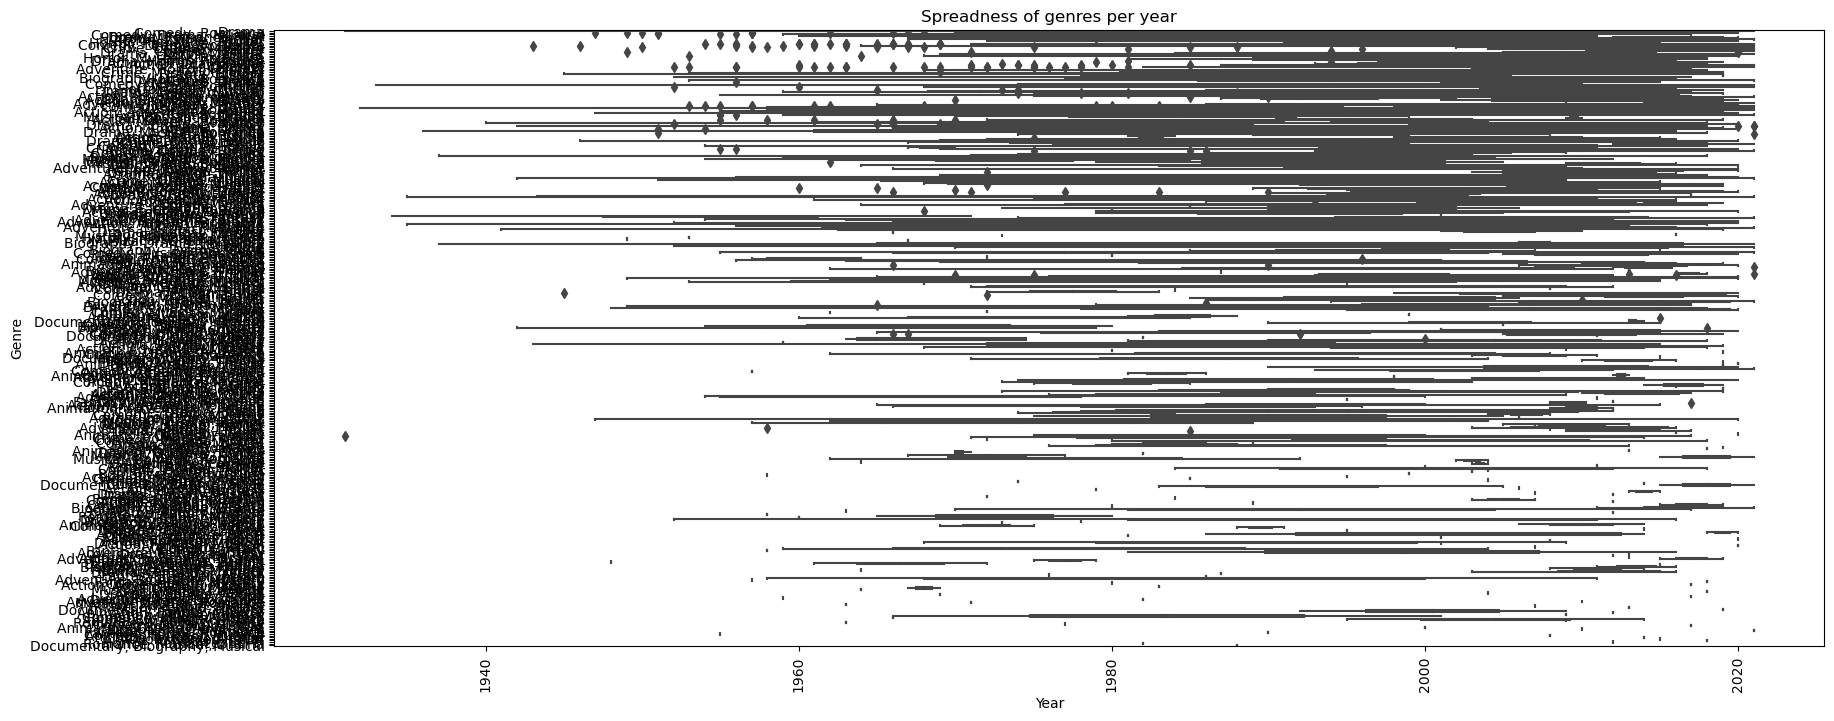

In [187]:
plt.figure(figsize=(20,8))
sns.boxplot(data=dataset, x= "Year", y="Genre")
plt.title('Spreadness of genres per year')
plt.xticks(rotation = 90)
plt.show()

M:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


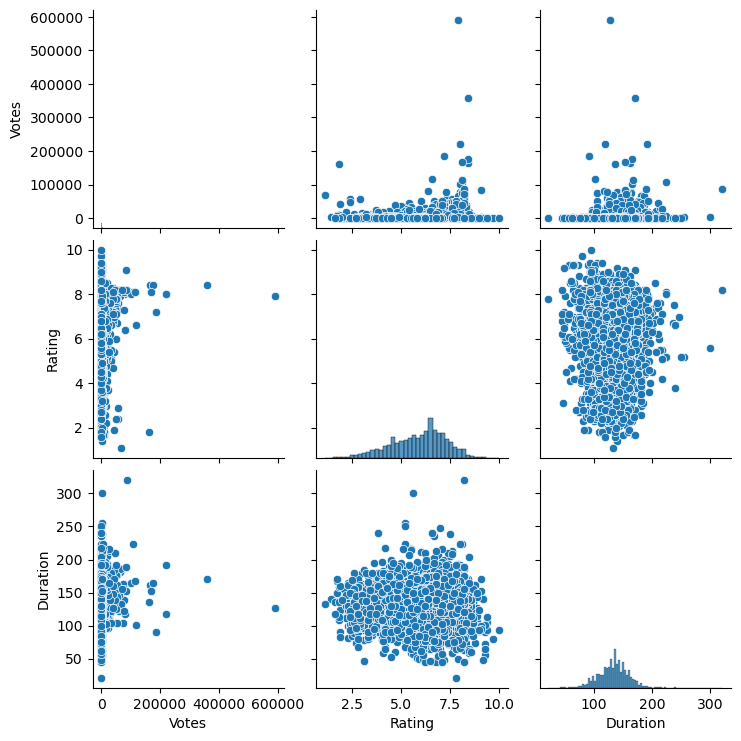

In [192]:
sns.pairplot(dataset[['Votes', 'Rating', 'Duration']]);

In [193]:
new_dataset = dataset.drop(['Name'], axis = 1)


In [194]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   int32  
 1   Duration  5659 non-null   int64  
 2   Genre     5659 non-null   object 
 3   Rating    5659 non-null   float64
 4   Votes     5659 non-null   int32  
 5   Director  5659 non-null   object 
 6   Actor 1   5659 non-null   object 
 7   Actor 2   5659 non-null   object 
 8   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 397.9+ KB


In [195]:
new_dataset.describe()


,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


TARGET ENCODING

In [196]:
director_encoding = new_dataset.groupby("Director").agg({"Rating": "mean"}).to_dict()
genre_encoding = new_dataset.groupby("Genre").agg({"Rating": "mean"}).to_dict()
actor1_encoding = new_dataset.groupby("Actor 1").agg({"Rating": "mean"}).to_dict()
actor2_encoding = new_dataset.groupby("Actor 2").agg({"Rating": "mean"}).to_dict()
actor3_encoding = new_dataset.groupby("Actor 3").agg({"Rating": "mean"}).to_dict()

new_dataset["director_encoded"] = round(new_dataset["Director"].map(director_encoding["Rating"]), 1)
new_dataset["genre_encoded"] = round(new_dataset["Genre"].map(genre_encoding["Rating"]), 1)
new_dataset["actor1_encoded"] = round(new_dataset["Actor 1"].map(actor1_encoding["Rating"]), 1)
new_dataset["actor2_encoded"] = round(new_dataset["Actor 2"].map(actor2_encoding["Rating"]), 1)
new_dataset["actor3_encoded"] = round(new_dataset["Actor 3"].map(actor3_encoding["Rating"]), 1)



In [197]:
new_dataset.drop([ "Director", "Genre", "Actor 1", "Actor 2", "Actor 3"], axis =1, inplace=True)

In [198]:
new_dataset.head()

,Year,Duration,Rating,Votes,director_encoded,genre_encoded,actor1_encoded,actor2_encoded,actor3_encoded
1,2019,109,7.0,8,7.0,6.4,6.8,7.0,7.0
3,2019,110,4.4,35,4.4,5.7,5.4,4.4,4.4
5,1997,147,4.7,827,5.3,6.2,4.8,5.8,5.9
6,2005,142,7.4,1086,7.4,6.8,5.4,6.9,6.5
8,2012,82,5.6,326,5.6,5.5,5.6,5.9,5.6


In [199]:
new_dataset.shape

(5659, 9)

Checking Correlation

In [200]:
#replacing all missing values with zero
new_dataset.fillna(0, inplace=True) 

num_columns  = new_dataset.select_dtypes(include=["Float64", "int64"]).columns
numeric_data = new_dataset[num_columns]

Plotting the heatmap

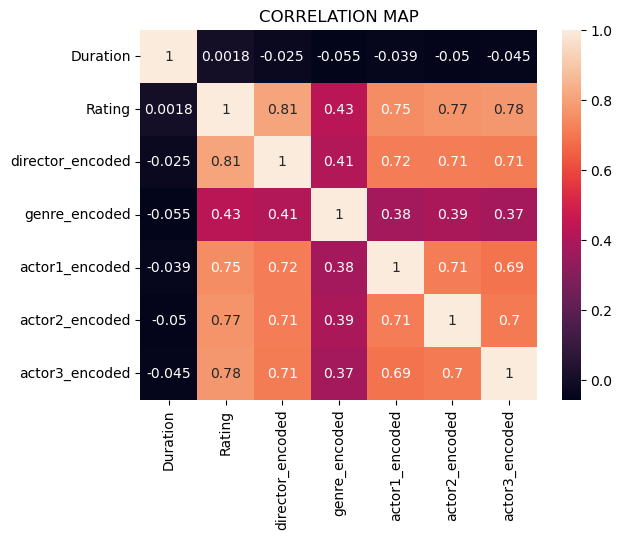

In [201]:
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('CORRELATION MAP')
plt.show()

In [202]:
x = new_dataset.drop( "Rating", axis=1)
y = new_dataset["Rating"]

In [203]:
x.head()

,Year,Duration,Votes,director_encoded,genre_encoded,actor1_encoded,actor2_encoded,actor3_encoded
1,2019,109,8,7.0,6.4,6.8,7.0,7.0
3,2019,110,35,4.4,5.7,5.4,4.4,4.4
5,1997,147,827,5.3,6.2,4.8,5.8,5.9
6,2005,142,1086,7.4,6.8,5.4,6.9,6.5
8,2012,82,326,5.6,5.5,5.6,5.9,5.6


Splitting data into train set and test set

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [205]:
print("Shape of Training Features:  ", x_train.shape)
print("Shape of Training Target:  ", y_train.shape)
print("Shape of Testing Features:  ", x_test.shape)
print("Shape of Testing Target:  ", y_test.shape)

Shape of Training Features:   (4527, 8)
Shape of Training Target:   (4527,)
Shape of Testing Features:   (1132, 8)
Shape of Testing Target:   (1132,)


##### MACHINE LEARNING MODEL CREATION AND EVALUAIION

Linear Regression

In [206]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

Model performance on the training data

In [207]:
print("Co-efficient of determination is equal to ", linear_reg.score(x_train, y_train))

Co-efficient of determination is equal to  0.7869742924331744


In [208]:
y_pred_linear_reg = linear_reg.predict(x_test)

In [209]:
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, y_pred_linear_reg)))
print("Mean Squared Error= ", mean_squared_error(y_test, y_pred_linear_reg)) 
print("Mean Absolute Error= ", mean_absolute_error(y_test, y_pred_linear_reg))
print("R^2 SCORE= ", r2_score(y_test, y_pred_linear_reg))

Root Mean Squared Error=  0.6510872609706452
Mean Squared Error=  0.4239146213982571
Mean Absolute Error=  0.4826774612067782
R^2 SCORE=  0.7710727279750976


Results DataFrame

In [210]:
results = pd.DataFrame({"actual": y_test, 
                        "predicted": y_pred_linear_reg.ravel(), 
                        "residual": y_test - y_pred_linear_reg}
                        )

In [211]:
results.head()

,actual,predicted,residual
10971,6.0,5.659593,0.340407
14052,2.4,1.546633,0.853367
10002,3.8,5.364042,-1.564042
3970,3.8,5.452960,-1.652960
8840,7.2,7.163426,0.036574


Using a scatter plot for data visualization, visualizing "Predicted" over "Actual"

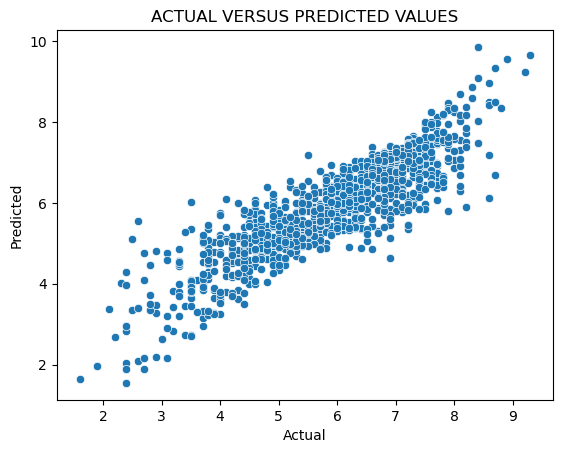

In [212]:
sns.scatterplot(x=results["actual"], y=results["predicted"])
plt.title("ACTUAL VERSUS PREDICTED VALUES")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Visualize distribution of Residuals using a historgram 

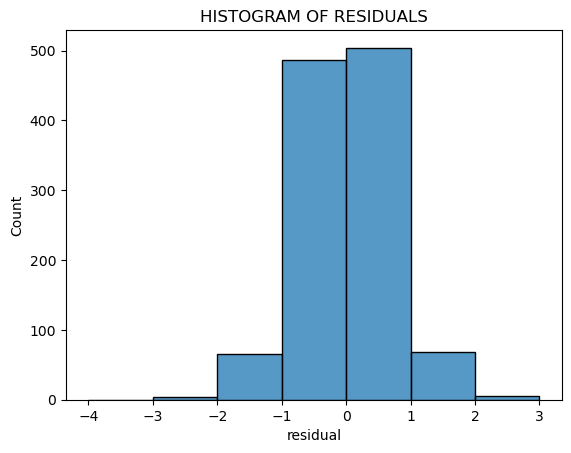

In [213]:
sns.histplot(results['residual'], bins=np.arange(-4,4,1))
plt.title('HISTOGRAM OF RESIDUALS')
plt.show()

Calculating residual mean using built in python function

In [214]:
results['residual'].mean()

0.011826106171747928

Plotting a scatter plot of residuals over predicted

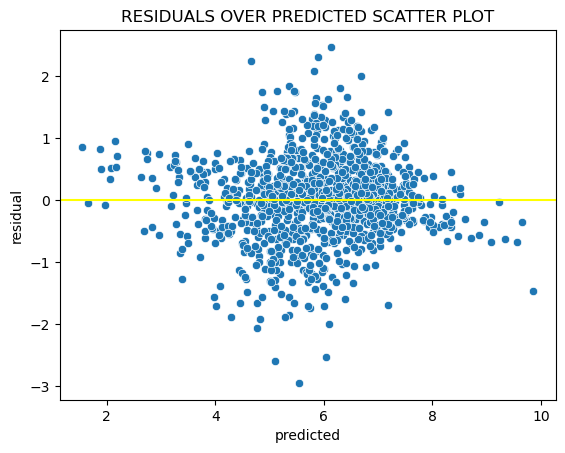

In [215]:
sns.scatterplot(x= results["predicted"],y=results["residual"] )
plt.axhline(0, c= "yellow")
plt.title("RESIDUALS OVER PREDICTED SCATTER PLOT")
plt.show()

Output of model's co-efficients

In [216]:
coeff=pd.DataFrame(linear_reg.coef_, index=x_train.columns).T
coeff

,Year,Duration,Votes,director_encoded,genre_encoded,actor1_encoded,actor2_encoded,actor3_encoded
0,-0.000068,0.001982,0.000005,0.414388,0.118056,0.200225,0.287359,0.33131


Linear Regression and Cross Validation

In [217]:
linear_reg_cv = LinearRegression()

k = 5  # k is the number of folds
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(linear_reg_cv, x_train, y_train, cv=cv, scoring='r2')

print("R^2 scores= ", scores)
print("mean R^2 = ", scores.mean())
print("standard deviation of R^2 =", scores.std())

R^2 scores=  [0.79180736 0.79472286 0.75668621 0.76412858 0.79613588]
mean R^2 =  0.7806961780205761
standard deviation of R^2 = 0.01679020265345847


RIDGE REGRESSION MODEL

In [218]:
RR = Ridge() #creating Ridge Regression Model
grid_of_parameter = {"alpha": [0.01, 0.1, 1, 10, 100]} #defining hyperparameter grid
grid_search_RR =  GridSearchCV(RR, grid_of_parameter, scoring='r2', cv=5)
grid_search_RR.fit(x_train, y_train)

grid_search_RR.best_params_

{'alpha': 10}

In [219]:
y_pred_RR = grid_search_RR.predict(x_test)

In [220]:
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, y_pred_RR)))
print("Mean Squared Error= ", mean_squared_error(y_test, y_pred_RR)) 
print("Mean Absolute Error= ", mean_absolute_error(y_test,y_pred_RR))
print("R^2 SCORE= ", r2_score(y_test, y_pred_RR))

Root Mean Squared Error=  0.6510810028951288
Mean Squared Error=  0.42390647233092676
Mean Absolute Error=  0.4826482402925673
R^2 SCORE=  0.7710771287285968


DECISION TREE REGRESSOR MODEL

In [224]:
tree = DecisionTreeRegressor(random_state=0)
param_grid = {"max_depth": [None, 10, 20, 30]}
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
grid_search_tree.fit(x_train, y_train)

grid_search_tree.best_params_

{'max_depth': 10}

In [225]:
y_pred_tree = grid_search_tree.predict(x_test)

In [226]:
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("Mean Squared Error= ", mean_squared_error(y_test, y_pred_tree)) 
print("Mean Absolute Error= ", mean_absolute_error(y_test,y_pred_tree))
print("R^2 SCORE= ", r2_score(y_test, y_pred_tree))

Root Mean Squared Error=  0.6892033804990422
Mean Squared Error=  0.4750012996913075
Mean Absolute Error=  0.4747450858106169
R^2 SCORE=  0.7434843096755208


RANDOM FOREST REGRESSOR MODEL

In [229]:
random_forest_model = RandomForestRegressor(random_state=0)
param_grid = {"min_samples_leaf": [1,3,5]}
grid_search_RF = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='r2')
grid_search_RF.fit(x_train, y_train)

grid_search_RF.best_params_

{'min_samples_leaf': 3}

In [230]:
y_pred_RF = grid_search_RF.predict(x_test)

In [231]:
print("Root Mean Squared Error= ", np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print("Mean Squared Error= ", mean_squared_error(y_test, y_pred_RF)) 
print("Mean Absolute Error= ", mean_absolute_error(y_test,y_pred_RF))
print("R^2 SCORE= ", r2_score(y_test, y_pred_RF))

Root Mean Squared Error=  0.5796039410608834
Mean Squared Error=  0.3359407284933081
Mean Absolute Error=  0.3976409623510915
R^2 SCORE=  0.8185814061275792
